### Kehua Chu (uid: 806153163)
##### Due:  Thu, Mar 7, 6pm in Bruinlearn

### Import Module

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTENC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification




### Problem 1 Use the dataset ‘marketing-campaign.csv’ uploaded on Canvas (description can be found here: https://archive.ics.uci.edu/dataset/222/bank+marketing). Convert categorical variables of you choice (you need not use all of them) into dummies and allocate a third of your data to the testing sample.

In [16]:
df = pd.read_csv('marketing_campaign.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Input variables:

   ##### bank client data:
  √ 1 - age (numeric)
   
  √ 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
   
  √ 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
  √ 4 - education (categorical: "unknown","secondary","primary","tertiary")
   
  √ 5 - default: has credit in default? (binary: "yes","no")
   
  √ 6 - balance: average yearly balance, in euros (numeric) 
   
  √ 7 - housing: has housing loan? (binary: "yes","no")
   
  √ 8 - loan: has personal loan? (binary: "yes","no")
   
   ##### related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
  ##### other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
 √ 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
 √ 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#### Output variable (desired target):
  
 √ 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [17]:
df = pd.get_dummies(df, columns = ["job","marital","default","housing","loan", "poutcome", "y", "education"],drop_first = True)

In [25]:
data = df.copy()
drop_columns = ['contact', 'day', 'month', 'duration', 'campaign','previous']
data = data.drop(columns = drop_columns)

### (i) First, suppose each tree in a random forest picks a random subset of 𝑚 = √𝑝 features at each split, where 𝑝 is the number of features in the data. On the training sample, fit the random forest to predict subscription to a term deposit. Vary the number of trees in the range {1, 2, 3, 4, 5, 10, 20, 50}. Plot accuracy, precision, recall, and F1 score on the testing sample against the number of trees.

In [26]:
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == object:
        data[column] = label_encoder.fit_transform(data[column])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['y_yes']), data['y_yes'], test_size=0.3, random_state=42)

In [28]:
num_trees = [1, 2, 3, 4, 5, 10, 20, 50]
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for n in num_trees:
    # Initialize random forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n, max_features=int(np.sqrt(10)), random_state=42)
    # Train classifier
    rf_classifier.fit(X_train, y_train)
    # Predict on test set
    y_pred = rf_classifier.predict(X_test)
    # Calculate evaluation metrics
    print('For number of', n, ': Accuracy is', accuracy_score(y_test, y_pred))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    print('For number of', n, ': Precision is', precision_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    print('For number of', n, ': Recall is', recall_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    print('For number of', n, ': F1 Score is', f1_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    print('-----------------------------------------------------------------')

For number of 1 : Accuracy is 0.8247567089354173
For number of 1 : Precision is 0.2485474499677211
For number of 1 : Recall is 0.2409261576971214
For number of 1 : F1 Score is 0.24467747060692724
-----------------------------------------------------------------
For number of 2 : Accuracy is 0.8716455322913594
For number of 2 : Precision is 0.3798319327731092
For number of 2 : Recall is 0.1414267834793492
For number of 2 : F1 Score is 0.20611035111719106
-----------------------------------------------------------------
For number of 3 : Accuracy is 0.8556473016809201
For number of 3 : Precision is 0.3381294964028777
For number of 3 : Recall is 0.23529411764705882
For number of 3 : F1 Score is 0.2774907749077491
-----------------------------------------------------------------
For number of 4 : Accuracy is 0.8727514007667355
For number of 4 : Precision is 0.4041916167664671
For number of 4 : Recall is 0.16896120150187735
For number of 4 : F1 Score is 0.2383053839364519
------------------

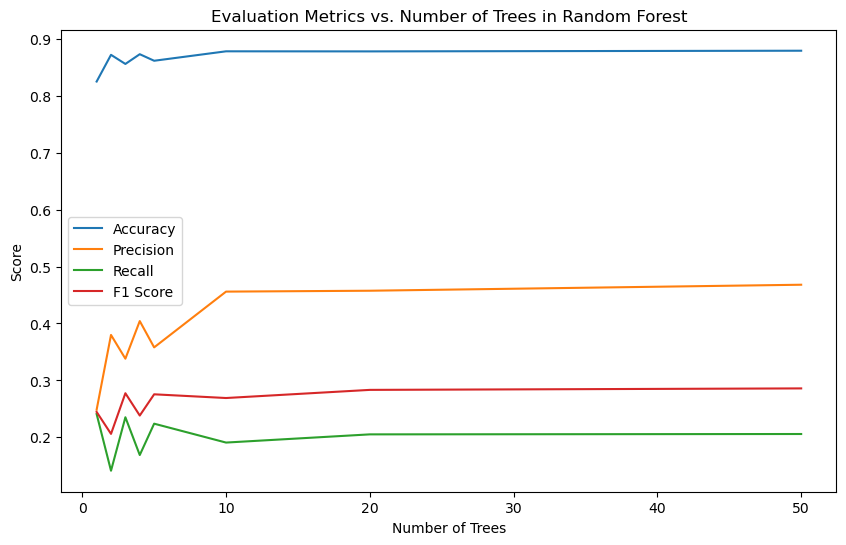

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(num_trees, accuracy_scores, label='Accuracy')
plt.plot(num_trees, precision_scores, label='Precision')
plt.plot(num_trees, recall_scores, label='Recall')
plt.plot(num_trees, f1_scores, label='F1 Score')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('Evaluation Metrics vs. Number of Trees in Random Forest')
plt.legend()
plt.show()

### (ii) Repeat (i) with bagging, i.e. 𝑚 = 𝑝.

In [30]:
num_trees = [1, 2, 3, 4, 5, 10, 20, 50]
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for n in num_trees:
    # Initialize random forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n, max_features=10, random_state=42)
    # Train classifier
    rf_classifier.fit(X_train, y_train)
    # Predict on test set
    y_pred = rf_classifier.predict(X_test)
    # Calculate evaluation metrics
    print('For number of', n, ': Accuracy is', accuracy_score(y_test, y_pred))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    print('For number of', n, ': Precision is', precision_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    print('For number of', n, ': Recall is', recall_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    print('For number of', n, ': F1 Score is', f1_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    print('-----------------------------------------------------------------')

For number of 1 : Accuracy is 0.8274845178413447
For number of 1 : Precision is 0.27098765432098765
For number of 1 : Recall is 0.27471839799749687
For number of 1 : F1 Score is 0.2728402734617775
-----------------------------------------------------------------
For number of 2 : Accuracy is 0.8757003833677381
For number of 2 : Precision is 0.420863309352518
For number of 2 : Recall is 0.14643304130162704
For number of 2 : F1 Score is 0.21727019498607242
-----------------------------------------------------------------
For number of 3 : Accuracy is 0.8582276614567974
For number of 3 : Precision is 0.3507805325987144
For number of 3 : Recall is 0.2390488110137672
For number of 3 : F1 Score is 0.2843319687383699
-----------------------------------------------------------------
For number of 4 : Accuracy is 0.8781332940135653
For number of 4 : Precision is 0.4533106960950764
For number of 4 : Recall is 0.16708385481852314
For number of 4 : F1 Score is 0.2441700960219479
------------------

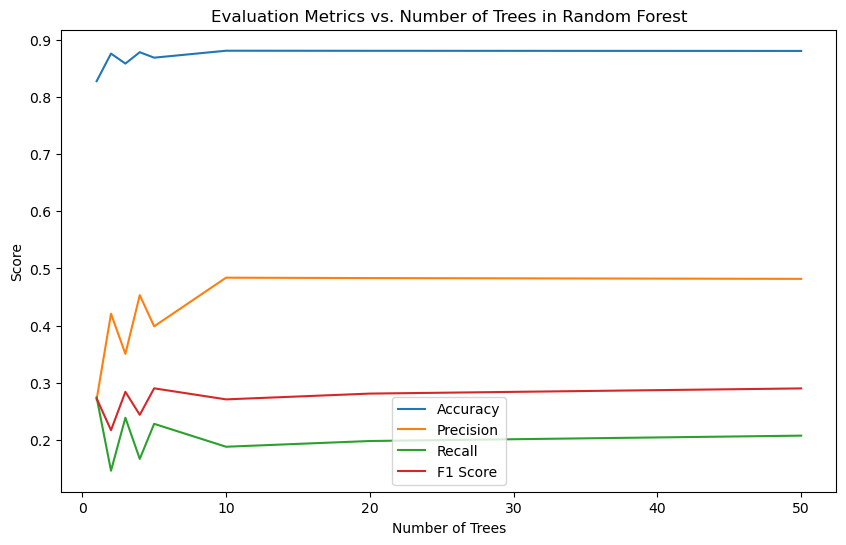

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(num_trees, accuracy_scores, label='Accuracy')
plt.plot(num_trees, precision_scores, label='Precision')
plt.plot(num_trees, recall_scores, label='Recall')
plt.plot(num_trees, f1_scores, label='F1 Score')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('Evaluation Metrics vs. Number of Trees in Random Forest')
plt.legend()
plt.show()

### (iii) Pick the best-performing model and use the feature_importances_ attribute of RandomForestClassifier to evaluate importance of different features. Is there a clearly dominating feature? Explain.

In [32]:
X = data.drop(columns=['y_yes'])
X

,age,balance,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,marital_single,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,education_secondary,education_tertiary,education_unknown
0,58,2143,-1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
1,44,29,-1,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,True,False,False
2,33,2,-1,False,True,False,False,False,False,False,...,False,False,True,True,False,False,True,True,False,False
3,47,1506,-1,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
4,33,1,-1,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,-1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
45207,71,1729,-1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
45208,72,5715,184,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
45209,57,668,-1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [33]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of RandomForestClassifier: {accuracy}')
print('--------------------------------------------------------------')

# Assuming RandomForestClassifier is the best model,
# let's look at the feature importances
feature_importances = rf.feature_importances_

# Creating a DataFrame for better visualization
features = [f'Feature{i+1}' for i in range(X.shape[1])]
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(feature_importance_df)
print('--------------------------------------------------------------')

# Check if there's a clearly dominating feature
dominating_feature = feature_importance_df.iloc[0]
if dominating_feature['Importance'] > 0.2:  # Example threshold for "dominating"
    print(f"The dominating feature is {dominating_feature['Feature']} with an importance of {dominating_feature['Importance']:.2f}.")
else:
    print("There is no clearly dominating feature.")


Accuracy of RandomForestClassifier: 0.8789442642288411
--------------------------------------------------------------
      Feature  Importance
0    Feature2    0.432598
1    Feature1    0.237029
2    Feature3    0.090583
3   Feature21    0.060441
4   Feature18    0.025632
5   Feature23    0.013426
6   Feature19    0.013285
7   Feature15    0.011972
8   Feature12    0.011573
9   Feature22    0.010862
10  Feature24    0.009839
11   Feature7    0.009683
12  Feature16    0.009505
13   Feature4    0.008732
14  Feature10    0.007628
15  Feature25    0.006255
16  Feature20    0.006102
17   Feature9    0.005500
18  Feature13    0.005464
19   Feature8    0.005120
20   Feature5    0.004831
21  Feature11    0.004692
22   Feature6    0.004149
23  Feature17    0.003253
24  Feature14    0.001842
--------------------------------------------------------------
The dominating feature is Feature2 with an importance of 0.43.


In [34]:
column_name_for_feature_2 = X.columns[1]  

print(f"Feature 2: {column_name_for_feature_2}")

Feature 2: balance


#### Explanation:

According to the results, $Balance$ is recognized as the most important feature. The reason might be that whether a client subscribes to a term deposit could indicate a strong relationship between a client's financial stability and their likelihood to invest in term deposits. In other words, if the clients have higher balances, they may be more financially secure and are more likely to choose low-risk investment products, like a term deposit, instead of buying stocks or funds.

### (iv) Beyond sampling variation, is there any other explanation for the alternating pattern in some performance metrics arising when the number of trees is very small?

This phenomenon might occur because of the limited number of trees. When there are only a few trees in a model, it might not be stable because each tree has a lot of influence on the model's overall predictions. This means that the decisions made by each tree can vary a lot, showing an alternating pattern in performance metrics. As the number of trees increases, the model becomes more stable. The fluctuations in performance metrics smooth out because the variance decreases when predictions from many trees are averaged. This helps balance the performance indicators, making the model's predictions more reliable.